# Центральная предельная теорема

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
%matplotlib inline
sns.set_context('talk')
colors = sns.color_palette("Set2", 4)

np.random.seed(1)

In [2]:
def plot_hists(distribution, colors=None):
    '''функция для построения гистограмм выборочных средних 
       для указанного распределения при разных объёмах выборки
       
       distribution - распределение
       colors - цвет графиков'''
    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharex='col', sharey='row')
    fig.suptitle('Гистограммы выборочных средних для 1000 выборок объёма $n$', size=20)
    
    # теоретические среднее и дисперсию можно получить через distribution.stats
    mean_distr, var_distr, _, _ = distribution.stats(moments='mvsk')
    
    print('теоретическое среднее = {:.3f}, теоретическая дисперсия = {:.3f}'.format(mean_distr, 
                                                                                    var_distr))
    # получение выборок объёма n 
    for idx, n in enumerate([3, 5, 10, 50]):
        data = distribution.rvs(size=(1000,n), random_state=n)
        # расчёт выборочных средних
        means = np.mean(data, axis=1)
    
        # построение гистограмм выборочных средних
        ax[idx // 2][idx % 2].hist(means, density=True, label='Гистограмма выборочных средних', 
                                   color=colors[idx])
   
        # выборочная дисперсия равна отношению теоретической дисперсии к объёму выборки
        sigma  = np.sqrt(var_distr / n)
        x_norm = np.linspace(mean_distr - 3*sigma, mean_distr + 3*sigma, 1000)
        
        # генерация плотности вероятности для нормального распределения
        theoretical_norm_pdf = sts.norm.pdf(x_norm, mean_distr, sigma)
        ax[idx // 2][idx % 2].plot(x_norm, theoretical_norm_pdf, 
                                   label='Плотность вероятности \nдля нормального распределения',
                                   alpha=0.9)
        ax[idx // 2][idx % 2].set_xlabel('$x$')
        ax[idx // 2][idx % 2].set_title(('$n$ = {}, выборочное среднее = {:.3f},' 
                                        '\nвыборочное с.к.о = {:.3f}').format(str(n),
                                                                              np.mean(means),
                                                                              np.std(means)))
        ax[idx // 2][idx % 2].legend(loc='upper right')
    return mean_distr, var_distr

# Полукруговое распределение Вигнера

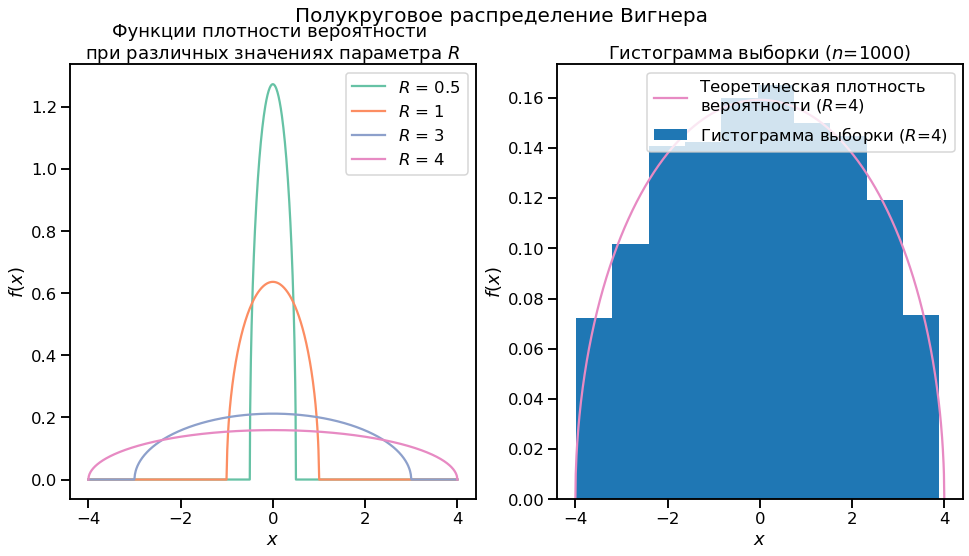

In [3]:
# центр
loc = 0 
# радиус
R = 4 

# распределение
semicircular = sts.semicircular(loc=loc, scale=R)

# генерация выборки
data = semicircular.rvs(size=1000, random_state=1)

# генерация теоретической плотности вероятности для распределения
x = np.linspace(sts.semicircular.ppf(0.0, loc, R),
                sts.semicircular.ppf(1, loc, R), 1000)
theoretical = sts.semicircular.pdf(x, loc, R)

# визуализируем распределения для разных R
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle('Полукруговое распределение Вигнера', size=20)

for i, R in enumerate([0.5, 1, 3, 4]):
    pdf = sts.semicircular.pdf(x, loc, R)
    ax1.plot(x, pdf, label='$R$ = {}'.format(R), color=colors[i]) 
                          
ax1.legend(loc='upper right')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax1.set_title('Функции плотности вероятности \nпри различных значениях параметра $R$');


ax2.hist(data, density=True, label='Гистограмма выборки ($R$={})'.format(R));
ax2.plot(x, theoretical, label='Теоретическая плотность \nвероятности ($R$={})'.format(R),
         color=colors[i]);
ax2.set_xlabel('$x$')
ax2.set_ylabel('$f(x)$')
ax2.legend(loc='upper right')
ax2.set_title('Гистограмма выборки ($n$=1000)');

теоретическое среднее = 0.000, теоретическая дисперсия = 4.000


array([ True,  True])

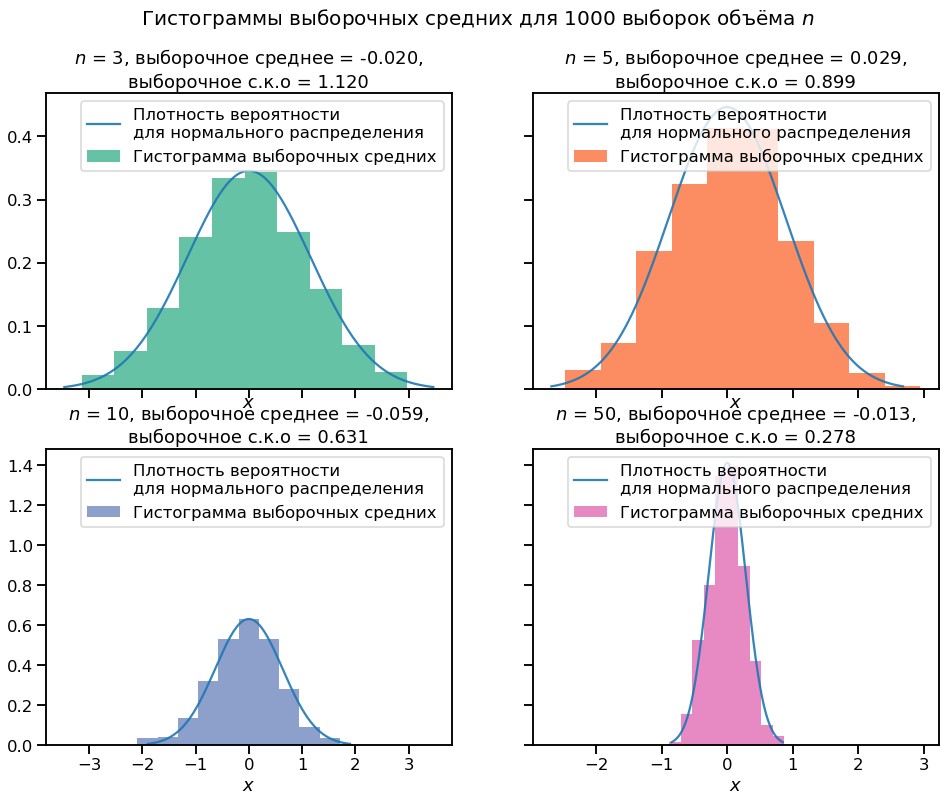

In [4]:
# построим гистограммы выборочных средних
# теоретическое среднее значение для полукругового распределения = 0
# теоретическое значение дисперсии для полукругового распределения = R**2/4
# в нашем случае оно будет автоматически находиться в функции
mean_semi, var_semi = plot_hists(distribution=semicircular, colors=colors)

# проверим теоретическое среднее и дисперсию
np.isclose([mean_semi, var_semi], [0, R**2/4])

# Треугольное распределение

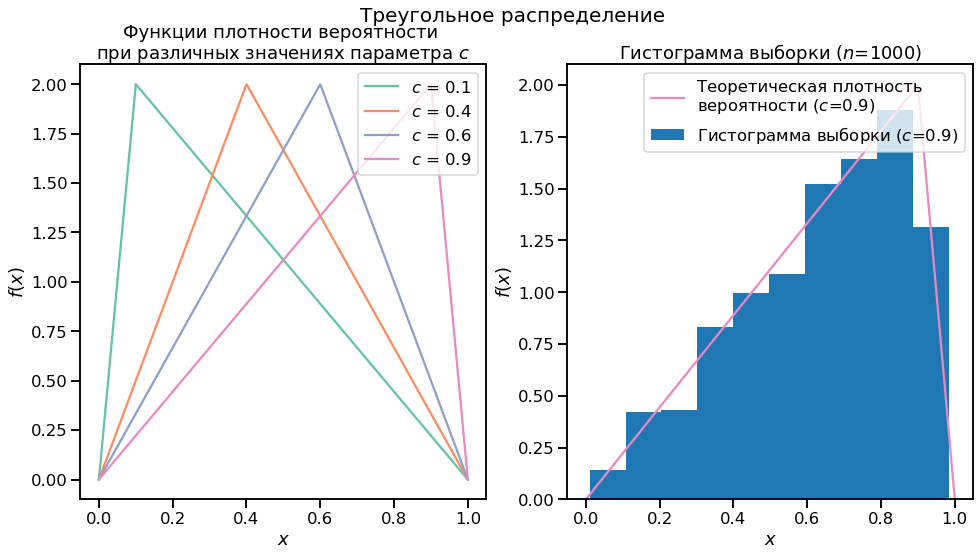

In [5]:
c = 0.9

# распределение
triangular = sts.triang(c=c)

# генерация выборки
data = triangular.rvs(size=1000, random_state=1)

# генерация теоретической плотности распределения
x = np.linspace(sts.triang.ppf(0, c),
                sts.triang.ppf(1, c), 1000)
theoretical = sts.triang.pdf(x, c)


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
fig.suptitle('Треугольное распределение', size=20)
# визаулизируем распределения для разных с
for i, c in enumerate([0.1, 0.4, 0.6, 0.9]):
    ax1.plot(x, sts.triang.pdf(x, c), label='$c$ = {}'.format(c), 
             color=colors[i]) 
                          
ax1.legend(loc='upper right')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$f(x)$')
ax1.set_title('Функции плотности вероятности \nпри различных значениях параметра $c$');

ax2.hist(data, density=True, label='Гистограмма выборки ($c$={})'.format(c));
ax2.plot(x, theoretical, label='Теоретическая плотность \nвероятности ($c$={})'.format(c), 
         color=colors[i]);
ax2.set_xlabel('$x$')
ax2.set_ylabel('$f(x)$')
ax2.legend(loc='upper right')
ax2.set_title('Гистограмма выборки ($n$=1000)');

теоретическое среднее = 0.633, теоретическая дисперсия = 0.051


array([ True,  True])

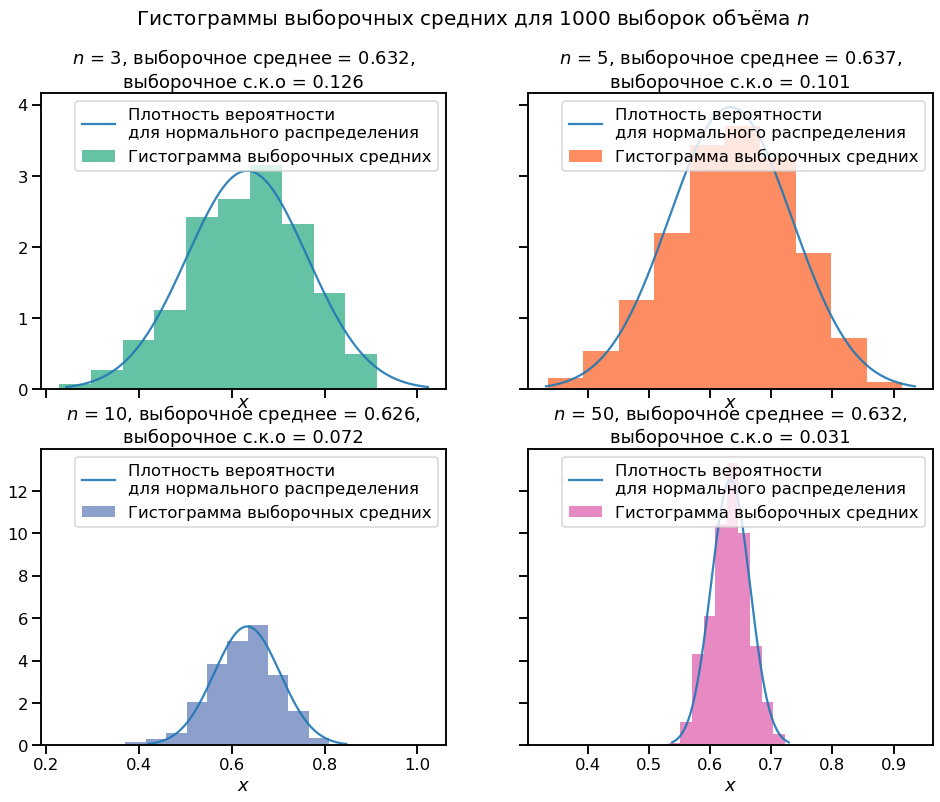

In [6]:
# для скошенного вправо распределения
c = 0.9
triangular_left = sts.triang(c=c)
mean_triang_left, var_triang_left = plot_hists(distribution=triangular_left, colors=colors)

# проверим теоретическое среднее ((a+b+c)/3) и дисперсию ((a^2+b^2+c^2-ab-ac-bc)/18)
np.isclose([mean_triang_left, var_triang_left], [(1 + c)/3, (1+c**2-c)/18])

теоретическое среднее = 0.367, теоретическая дисперсия = 0.051


array([ True,  True])

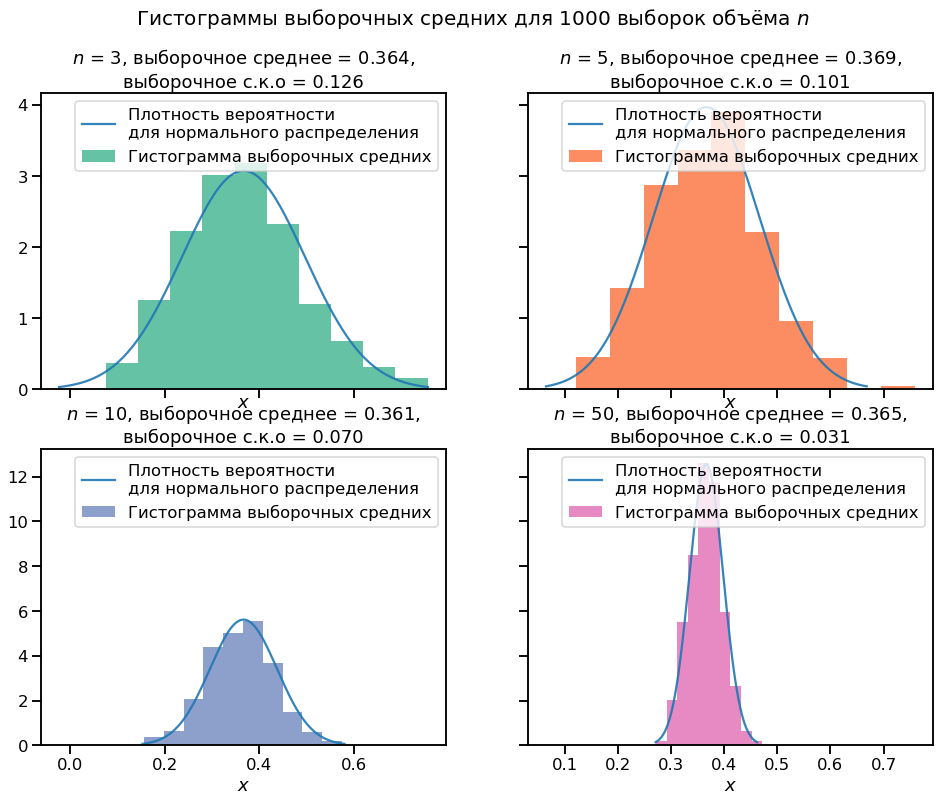

In [7]:
# для скошенного влево распределения
c = 0.1
triangular_right = sts.triang(c=c)
mean_triang_right, var_triang_right = plot_hists(distribution=triangular_right, colors=colors)
np.isclose([mean_triang_right, var_triang_right], [(1 + c)/3, (1+c**2-c)/18])

# Выводы

В соответствии с центральной предельной теоремой, при увеличении объёма выборки из заданного распределения гистограммы выборочных средних сужаются (на что указывают и уменьшающиеся значения выборочной дисперсии), а их форма сглаживается и всё больше начинает напоминать форму нормального распределения. Выборочное среднее, в свою очередь, приближается к теоретическимум среднему заданного распределения. Таким образом, с увеличением $n$ увеличивается и точность апроксимации распределения выборочных средних нормальным распределением.